In [5]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

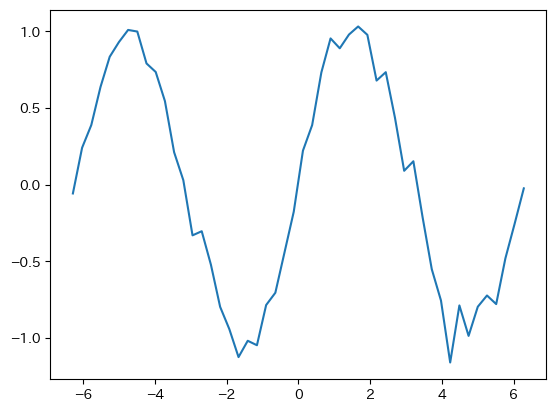

(40, 10, 1)
(40, 10, 1)


In [7]:
x_data = np.linspace(-2*np.pi,2*np.pi)
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))

plt.plot(x_data,sin_data)
plt.show()

n_rnn = 10
n_sample = len(x_data) - n_rnn
x = np.zeros((n_sample,n_rnn))
t = np.zeros((n_sample,n_rnn))
for i in range(0,n_sample):
    x[i] = sin_data[i:i+n_rnn]
    t[i] = sin_data[i+1:i+n_rnn+1]

x = x.reshape(n_sample,n_rnn,1)
print(x.shape)
t = t.reshape(n_sample,n_rnn,1)
print(t.shape)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN

batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

model = Sequential()
model.add(SimpleRNN(n_mid,input_shape=(n_rnn,n_in),return_sequences=True))
model.add(Dense(n_out,activation='linear'))
model.compile(loss="mean_squared_error",optimizer="sgd")
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 20)            440       
                                                                 
 dense (Dense)               (None, 10, 1)             21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
history = model.fit(x,t,epochs=20,batch_size=batch_size,validation_split=0.1)

Epoch 1/20
5/5 [==============================] - 1s 52ms/step - loss: 1.3918 - val_loss: 0.7541
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 0.5030 - val_loss: 0.3515
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.2648 - val_loss: 0.2147
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 0.1783 - val_loss: 0.1667
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 0.1384 - val_loss: 0.1449
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.1177 - val_loss: 0.1294
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.1058 - val_loss: 0.1141
Epoch 8/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0969 - val_loss: 0.1143
Epoch 9/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0909 - val_loss: 0.0984
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0853 - val_loss: 0.0953
Epoch 11/20
5/5 [================

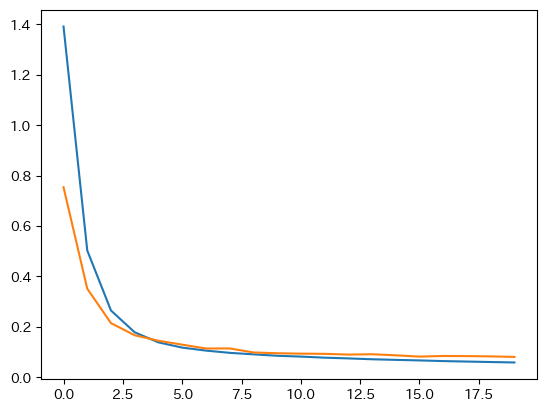

In [12]:
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)),loss)
plt.plot(np.arange(len(vloss)),vloss)
plt.show()

1/1 [==============================] - 0s 19ms/step


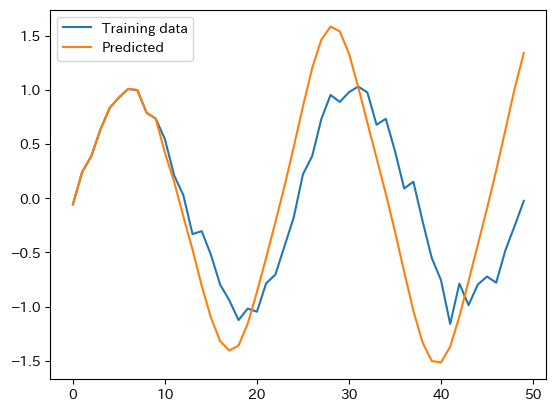

In [13]:
predicted = x[0].reshape(-1)

for i in range(0,n_sample):
    y = model.predict(predicted[-n_rnn:].reshape(1,n_rnn,1))
    predicted = np.append(predicted,y[0][n_rnn-1][0])

plt.plot(np.arange(len(sin_data)),sin_data,label='Training data')
plt.plot(np.arange(len(predicted)),predicted,label='Predicted')
plt.legend()
plt.show()